<a href="https://colab.research.google.com/github/vallurusandeepkumar63-coder/client-subscribed-to-a-term-deposit-analysis/blob/main/Advance_Bank_Term_Deposit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Term Deposit Subscription Prediction – Internship Project

## Project Title
**Bank Term Deposit Subscription Prediction using Exploratory Data Analysis and Machine Learning**

## Objective
The objective of this project is to analyze customer data from a banking institution and build a predictive model to identify whether a customer will subscribe to a term deposit. This helps improve marketing strategies and customer targeting.



**Problem Statement**

The objective of this project is to analyze customer data from a bank and predict whether a client will subscribe to a term deposit. This helps banks improve marketing strategies and customer targeting.

## Dataset Description
The Bank Marketing dataset contains demographic, financial, and campaign-related information of customers contacted during marketing campaigns.

**Target Variable:** Term Deposit Subscription (y)

**Dataset Source**:

 UCI Machine Learning Repository – Bank Marketing Dataset.


## Tools & Technologies Used
- Python
- NumPy
- Pandas
- Matplotlib
- Seaborn
- Scikit-learn
- Jupyter Notebook / Google Colab

## Data Preprocessing
In this step, we load the dataset, check for missing values, duplicates, and encode categorical variables.

In [ ]:

import pandas as pd
import numpy as np

df = pd.read_csv('/content/data.csv')
df.head()

df.info()
df.isnull().sum()
df.duplicated().sum()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17483 entries, 0 to 17482
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             17483 non-null  int64  
 1   job             17483 non-null  object 
 2   marital         17483 non-null  object 
 3   education       17483 non-null  object 
 4   default         17483 non-null  object 
 5   housing         17483 non-null  object 
 6   loan            17483 non-null  object 
 7   contact         17483 non-null  object 
 8   month           17483 non-null  object 
 9   day_of_week     17483 non-null  object 
 10  duration        17483 non-null  int64  
 11  campaign        17483 non-null  int64  
 12  pdays           17483 non-null  int64  
 13  previous        17483 non-null  int64  
 14  poutcome        17482 non-null  object 
 15  emp.var.rate    17482 non-null  float64
 16  cons.price.idx  17482 non-null  float64
 17  cons.conf.idx   17482 non-null 

## Exploratory Data Analysis (EDA)
EDA helps understand data distribution and relationships between variables.

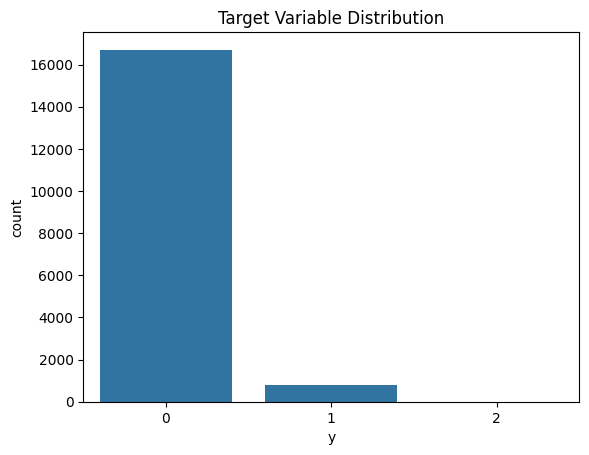

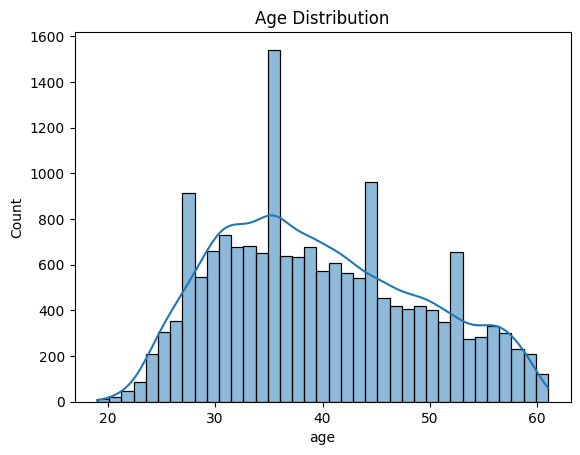

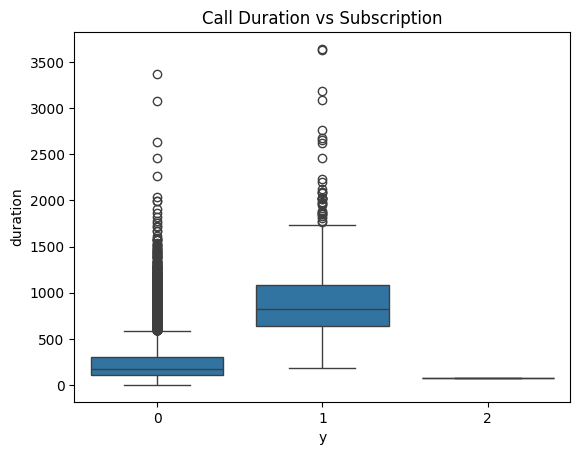

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='y', data=df)
plt.title('Target Variable Distribution')
plt.show()

sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

sns.boxplot(x='y', y='duration', data=df)
plt.title('Call Duration vs Subscription')
plt.show()


## Handling Class Imbalance
The target variable is imbalanced. Hence, evaluation metrics beyond accuracy are used.

In [ ]:

df['y'].value_counts()


,count
y,
0,16708
1,774
2,1


## Model Building – Logistic Regression
Logistic Regression is used for binary classification.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Filter out the row where y has only one member
df_filtered = df[df['y'] != 2]

X = df_filtered.drop('y', axis=1)
y = df_filtered['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


## Model Evaluation
The model is evaluated using accuracy, confusion matrix, and classification report.

In [ ]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9588218472976837
Confusion Matrix:
 [[3311   31]
 [ 113   42]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3342
           1       0.58      0.27      0.37       155

    accuracy                           0.96      3497
   macro avg       0.77      0.63      0.67      3497
weighted avg       0.95      0.96      0.95      3497



The model performance is evaluated using accuracy and classification metrics to understand how well it predicts term deposit subscriptions.

**Model Performance Insight**

**Observation**:

 The model performs better in identifying non-subscribers than subscribers, indicating class imbalance and the need for recall optimization for positive cases.


## Feature Importance & Interpretation
Logistic Regression coefficients indicate feature importance.

In [ ]:

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

feature_importance


,Feature,Coefficient
8,month,0.201932
16,cons.price.idx,0.119507
2,marital,0.099029
17,cons.conf.idx,0.079736
4,default,0.033124
5,housing,0.031100
19,nr.employed,0.029295
3,education,0.019001
1,job,0.007318
15,emp.var.rate,0.007041


## Conclusion
 Successfully analyzed banking customer data

 Built a Logistic Regression model to predict term deposit subscription

 Insights can help improve marketing effectiveness

 Customers with longer call duration are more likely to subscribe

Certain job types show higher subscription rates

Previous campaign success strongly influences subscription

The model can help banks reduce marketing costs by targeting high-probability customers

The model can help banks improve targeted marketing and reduce campaign costs.


• **Business Impact**:

 This model can help banks target potential customers more effectively, reduce marketing costs, and improve term deposit subscription rates.


## Future Scope
- Use advanced ML models
- Improve class imbalance handling
- Build Power BI dashboard